# Content

A loan application is used by borrowers to apply for a loan. Through the loan application, borrowers reveal key details about their finances to the lender. The loan application is crucial to determining whether the lender will grant the request for funds or credit.

![Loan](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/loan.png)

# Importing Labriries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data Train & Test


In [7]:
loan_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_train.csv",index_col=False)
loan_data = loan_data.drop(['Unnamed: 0'], axis=1)
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3+,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1


In [8]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/Loan_Data/loan_test.csv')
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001116,Male,No,0,Not Graduate,No,3748,1668.0,110.0,360.0,1.0,Semiurban
1,LP001488,Male,Yes,3+,Graduate,No,4000,7750.0,290.0,360.0,1.0,Semiurban
2,LP002138,Male,Yes,0,Graduate,No,2625,6250.0,187.0,360.0,1.0,Rural
3,LP002284,Male,No,0,Not Graduate,No,3902,1666.0,109.0,360.0,1.0,Rural
4,LP002328,Male,Yes,0,Not Graduate,No,6096,0.0,218.0,360.0,0.0,Rural


In [9]:
loan_data.shape

(491, 13)

We have 491 rows and 13 columns in train dataset.

In [10]:
test_data.shape

(123, 12)

We have 123 rows and 12 columns in test dataset.

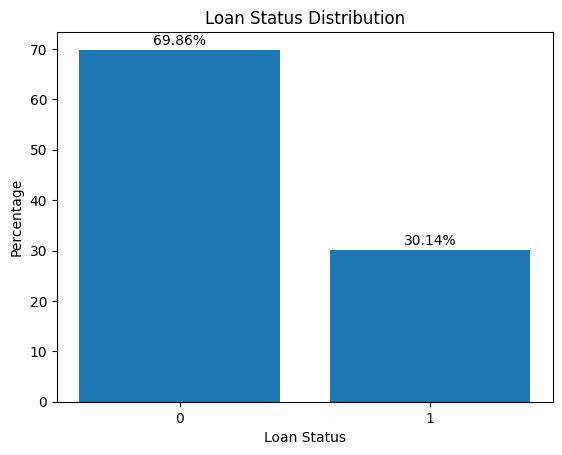

In [11]:
import matplotlib.pyplot as plt

loan_status_counts = loan_data['Loan_Status'].value_counts()
total_count = len(loan_data)

percentages = (loan_status_counts / total_count) * 100

plt.bar(['0', '1'], percentages)
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.title('Loan Status Distribution')

# Optionnel: Ajoutez les pourcentages au-dessus de chaque barre
for i, v in enumerate(percentages):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')

plt.show()

The loan of 343(around 69.85%) people out of 491 were approved.

We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [12]:
# print(train.dtypes)
loan_data['Dependents'].replace('3+', 3,inplace=True)
test_data['Dependents'].replace('3+', 3,inplace=True)

In [13]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002305,Female,No,0,Graduate,No,4547,0.0,115.0,360.0,1.0,Semiurban,1
1,LP001715,Male,Yes,3,Not Graduate,Yes,5703,0.0,130.0,360.0,1.0,Rural,1
2,LP002086,Female,Yes,0,Graduate,No,4333,2451.0,110.0,360.0,1.0,Urban,0
3,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,1
4,LP002529,Male,Yes,2,Graduate,No,6700,1750.0,230.0,300.0,1.0,Semiurban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,1
487,LP001790,Female,No,1,Graduate,No,3812,0.0,112.0,360.0,1.0,Rural,1
488,LP001401,Male,Yes,1,Graduate,No,14583,0.0,185.0,180.0,1.0,Rural,1
489,LP002893,Male,No,0,Graduate,No,1836,33837.0,90.0,360.0,1.0,Urban,0


Now let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

<Axes: >

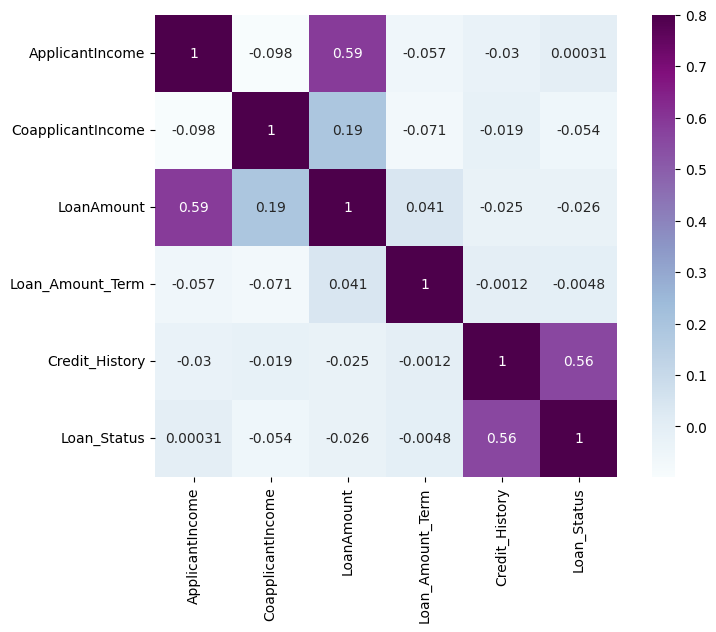

In [14]:
matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)


Now let's look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

We see that the most correlate variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). 

(LoanAmount is also correlated with CoapplicantIncome).

## Missing value imputation

Let's list out feature-wise count of missing values.

In [15]:
loan_data.isnull().sum()

Loan_ID               0
Gender               10
Married               1
Dependents            9
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     13
Credit_History       43
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

  * For numerical variables: imputation using mean or median
  * For categorical variables: imputation using mode
  
There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [16]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable

In [17]:
loan_data['Loan_Amount_Term'].value_counts()


360.0    404
180.0     35
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
12.0       1
60.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [18]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use the median to fill the null values as earlier we saw that the loan amount has outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [19]:
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [20]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As we can see that all the missing values have been filled in the test dataset. Let’s fill all the missing values in the test dataset too with the same approach.

In [21]:
test_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
test_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
test_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
test_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
test_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
test_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)
test_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

## Outlier Treatement

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

Let's examine what can happen to a data set with __outliers__. 

For the sample data set:

__1,1,2,2,2,2,3,3,3,4,4__

We find the following: mean, median, mode, and standard deviation

* Mean = 2.58
* Median = 2.5
* Mode=2
* Standard Deviation = 1.08

If we add an outlier to the data set:

__1,1,2,2,2,2,3,3,3,4,4,400__

The new values of our statistics are:

* Mean = 35.38
* Median = 2.5
* Mode=2
* Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. 

We must take steps to remove outliers from our data sets.


Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. 

This is called __right skewness__. One way to remove the __skewness__ is by doing the __log transformation.__ 

As we take the __log transformation__, it does not affect the smaller values much, but reduces the larger values. So, we get a __distribution__ similar to __normal distribution__.


Let’s visualize the effect of __log transformation__. We will do the similar changes to the test file simultaneously.

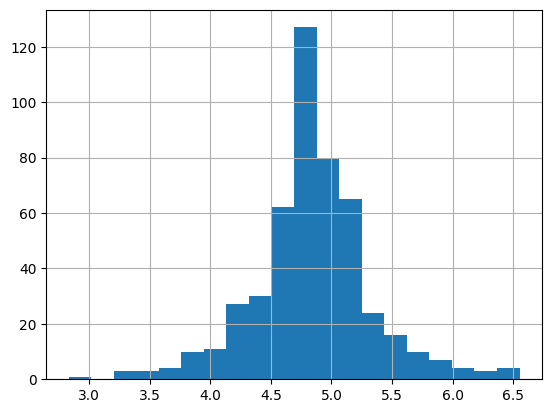

In [22]:
loan_data['LoanAmount_log']=np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)
test_data['LoanAmount_log']=np.log(test_data['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

Let's build a logistic regression model and make predictions for the test dataset.


# Model Building : 



In [23]:
loan_data=loan_data.drop('Loan_ID',axis=1)
test_data=test_data.drop('Loan_ID',axis=1)

In [24]:
X = loan_data.drop('Loan_Status',axis=1)
y = loan_data.Loan_Status
X = pd.get_dummies(X)

In [25]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmount_log,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,4547,0.0,115.0,360.0,1.0,4.744932,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
1,5703,0.0,130.0,360.0,1.0,4.867534,0,1,0,1,...,0,0,0,0,1,0,1,1,0,0
2,4333,2451.0,110.0,360.0,1.0,4.700480,1,0,0,1,...,1,0,0,1,0,1,0,0,0,1
3,4695,0.0,96.0,360.0,1.0,4.564348,0,1,0,1,...,1,0,0,0,1,0,1,0,0,1
4,6700,1750.0,230.0,300.0,1.0,5.438079,0,1,0,1,...,0,0,1,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,9833,1833.0,182.0,180.0,1.0,5.204007,0,1,0,1,...,0,1,0,1,0,0,1,0,0,1
487,3812,0.0,112.0,360.0,1.0,4.718499,1,0,1,0,...,0,1,0,1,0,1,0,1,0,0
488,14583,0.0,185.0,180.0,1.0,5.220356,0,1,0,1,...,0,1,0,1,0,1,0,1,0,0
489,1836,33837.0,90.0,360.0,1.0,4.499810,0,1,1,0,...,1,0,0,1,0,1,0,0,0,1


In [26]:
X.shape

(491, 21)

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

### __Decision Tree__

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

For detailed explanation visit https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six

Let’s fit the decision tree model with 5 folds of cross validation.

In [28]:
from sklearn import tree
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())

In [29]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score
# Créer le classifieur de l'arbre de décision avec élagage
#clf = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=5, min_samples_leaf=2)
clf = DecisionTreeClassifier(random_state=1)

# Effectuer la validation croisée avec StratifiedKFold et l'exactitude comme métrique
cv = StratifiedKFold(n_splits=5)
scores = cross_val_score(clf, X, y, cv=cv, scoring='accuracy')

# scores of cross validation
print("Scores de validation croisée :", scores)
print("Score moyen de validation croisée :", scores.mean())

# Entraîner le classifieur sur l'ensemble d'entraînement
clf.fit(x_train, y_train)

# predict classes for testing set 
y_pred = clf.predict(x_test)

# computethe accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy :", accuracy)

Scores de validation croisée : [0.70707071 0.75510204 0.64285714 0.67346939 0.69387755]
Score moyen de validation croisée : 0.6944753659039373
Test accuracy : 0.7162162162162162


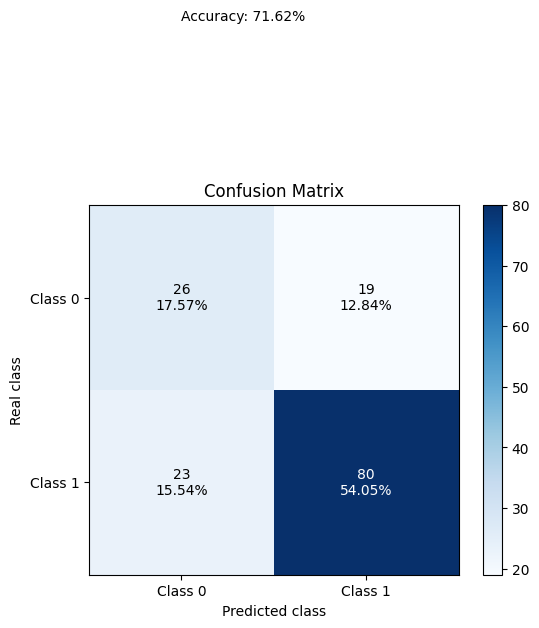

In [30]:
from sklearn.metrics import confusion_matrix
# Display confusion matrix
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Class 0', 'Class 1'])
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.xlabel('Predicted class')
plt.ylabel('Real class')

# Display accuracy
plt.text(0, -1.5, f'Accuracy: {accuracy*100:.2f}%', ha='left')
    
# Display the number of instances and percentage in each part of the matrix
total_instances = np.sum(cm)
for i in range(2):
    for j in range(2):
        count = cm[i, j]
        percentage = count / total_instances * 100
        plt.text(j, i, f'{count}\n{percentage:.2f}%', ha='center', va='center',
               color='white' if cm[i, j] > cm.max() / 2 else 'black')
    

plt.show()

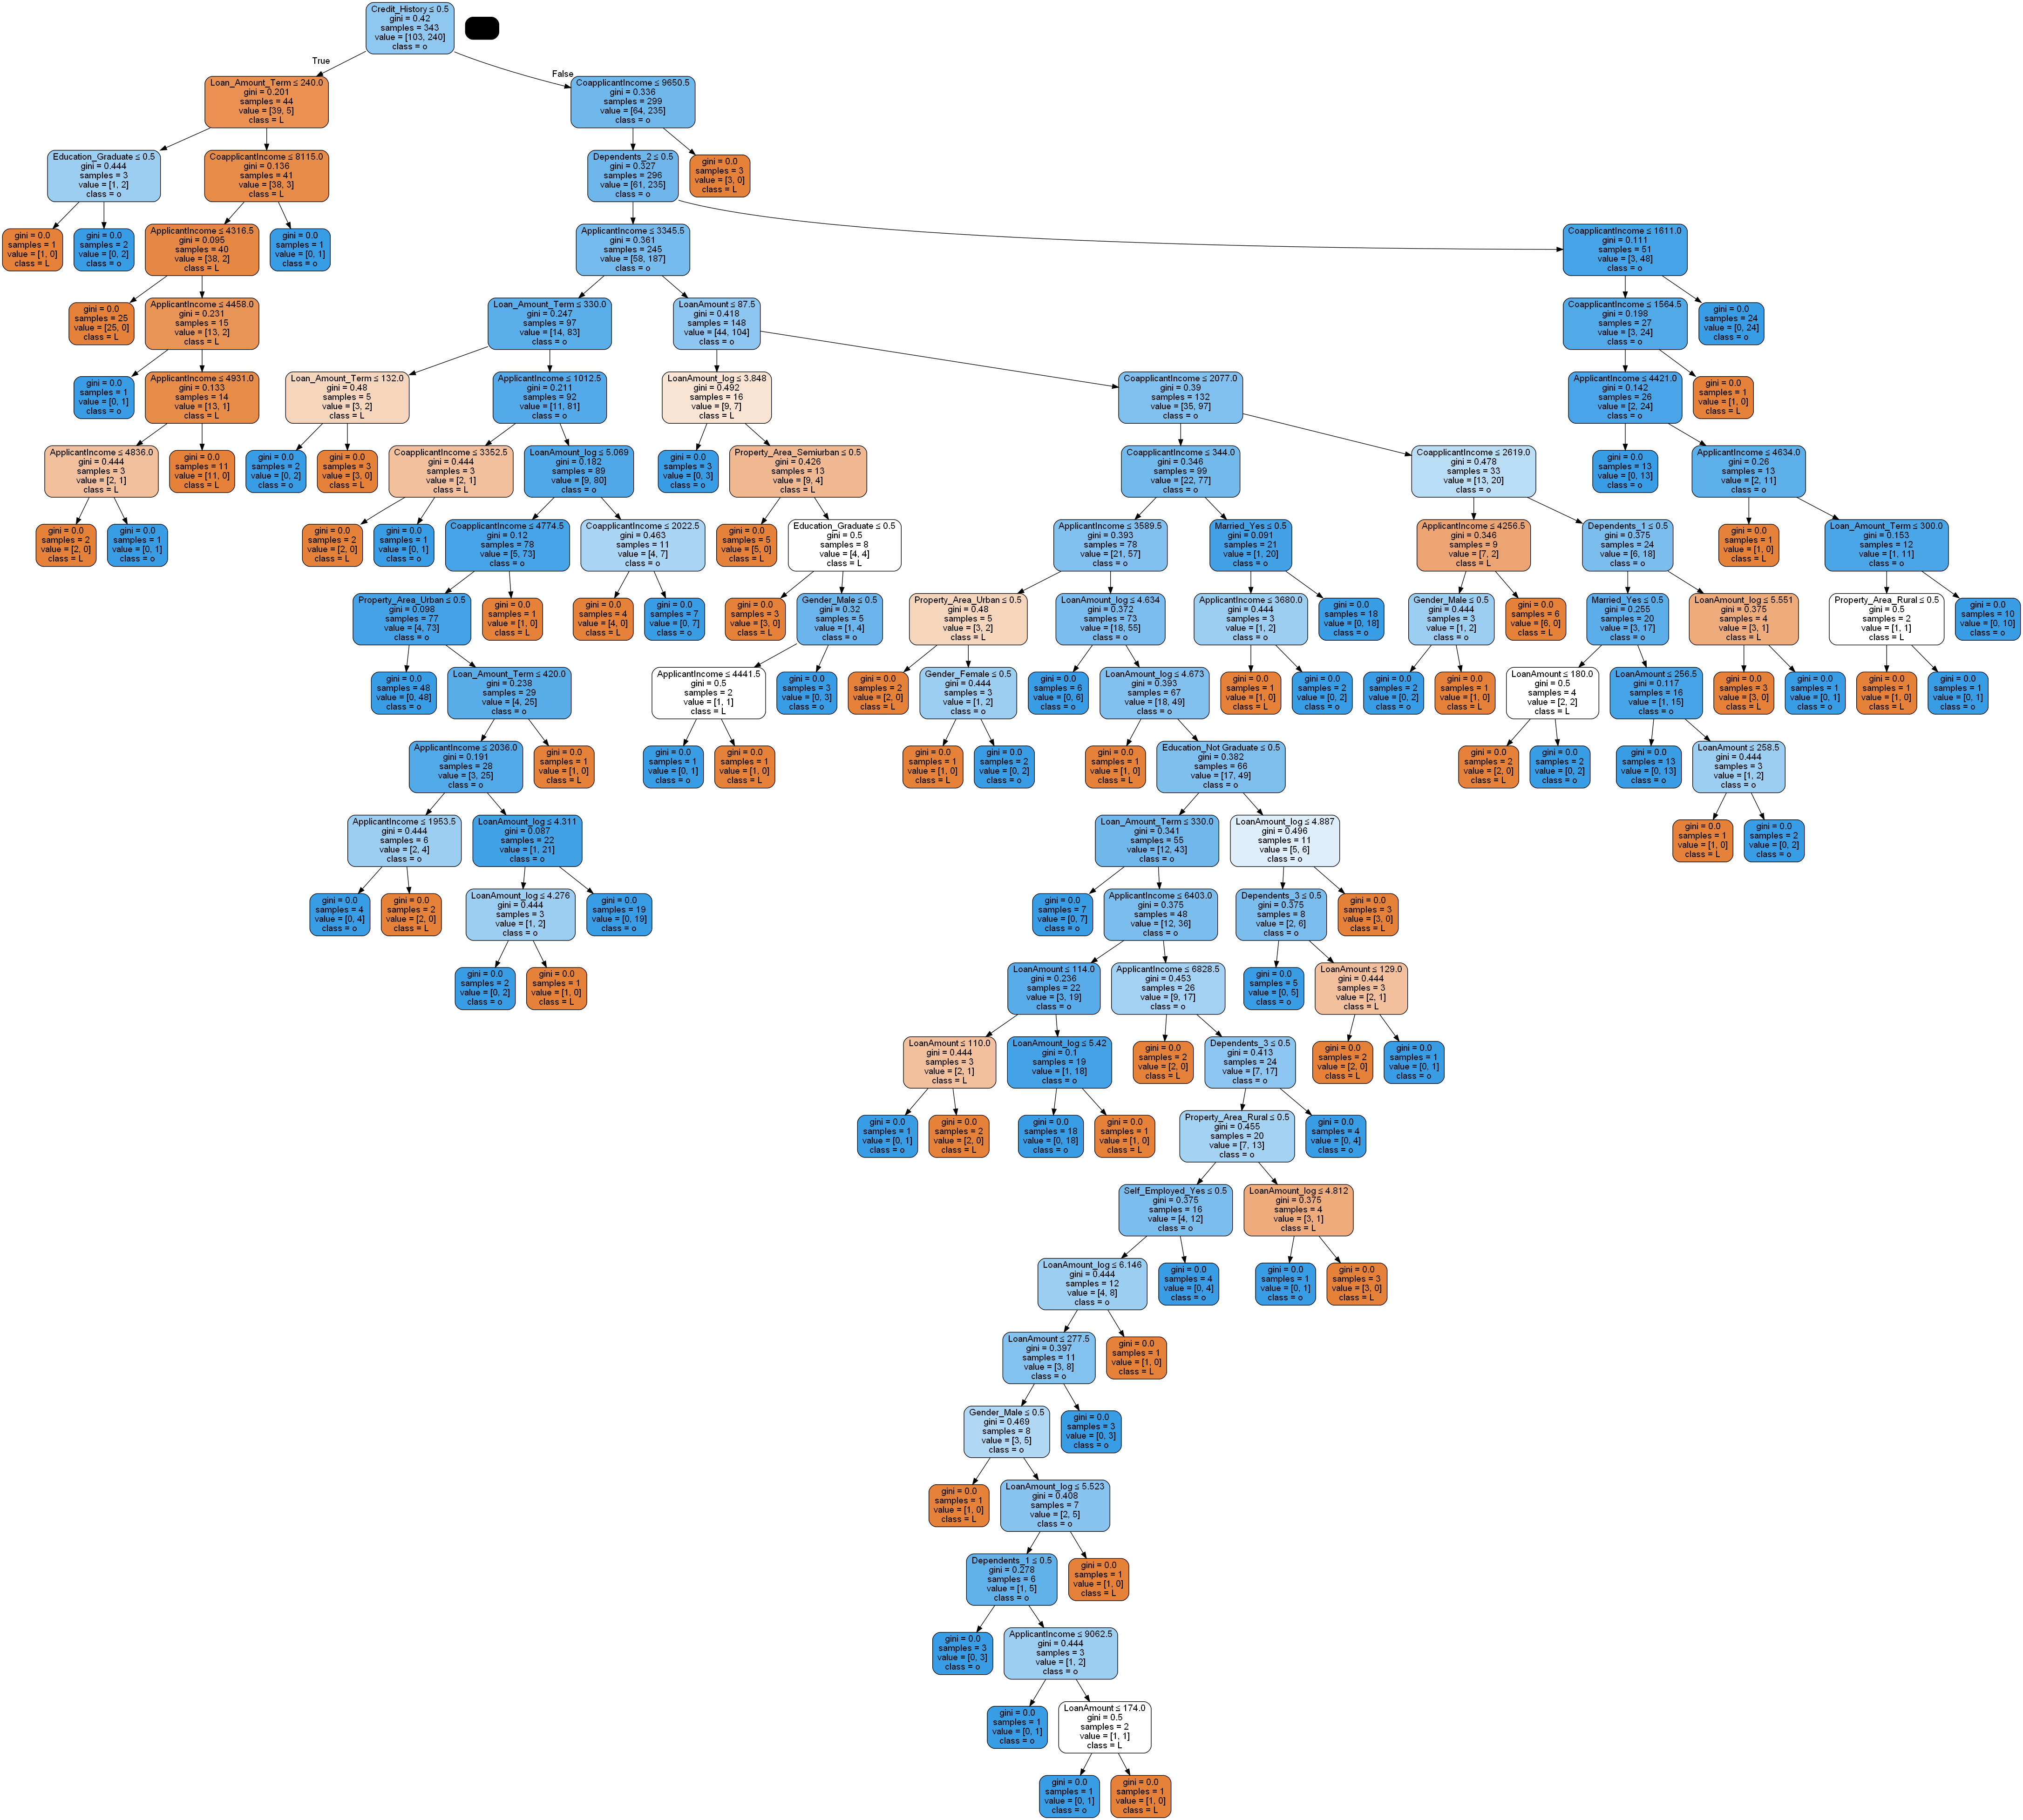

In [31]:
from io import StringIO
import pydotplus
from IPython.display import Image 
plot_decision_tree(clf, x_train.columns,loan_data.columns[11])

In [32]:
from sklearn.tree import export_text

# Extract the rules from the decision tree
rules = export_text(clf, feature_names=list(X.columns))
print(rules)

# Count the number of rules
nb_regles = rules.count('class:')
print("Nombre de règles :", nb_regles)


|--- Credit_History <= 0.50
|   |--- Loan_Amount_Term <= 240.00
|   |   |--- Education_Graduate <= 0.50
|   |   |   |--- class: 0
|   |   |--- Education_Graduate >  0.50
|   |   |   |--- class: 1
|   |--- Loan_Amount_Term >  240.00
|   |   |--- CoapplicantIncome <= 8115.00
|   |   |   |--- ApplicantIncome <= 4316.50
|   |   |   |   |--- class: 0
|   |   |   |--- ApplicantIncome >  4316.50
|   |   |   |   |--- ApplicantIncome <= 4458.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- ApplicantIncome >  4458.00
|   |   |   |   |   |--- ApplicantIncome <= 4931.00
|   |   |   |   |   |   |--- ApplicantIncome <= 4836.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- ApplicantIncome >  4836.00
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- ApplicantIncome >  4931.00
|   |   |   |   |   |   |--- class: 0
|   |   |--- CoapplicantIncome >  8115.00
|   |   |   |--- class: 1
|--- Credit_History >  0.50
|   |--- CoapplicantIncome <= 9650.50
|   | 

In [33]:
# New instance
new_instance = [
    [4547, 0.0, 115.0, 360.0, 1.0, 4.744932, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]
]

# Predict the loan status for the new instance
prediction = clf.predict(new_instance)

# Print the predicted loan status
print("Predicted Loan Status:", prediction)

Predicted Loan Status: [1]


# MLP

In [34]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


# Prétraitement et mise à l'échelle des données
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

# Convertir les données en tenseurs PyTorch
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values.reshape(-1, 1), dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values.reshape(-1, 1), dtype=torch.float32)

# Définir la classe du modèle
class Model(nn.Module):
    def __init__(self, input_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, 32)
        self.fc2 = nn.Linear(32, 16)
        self.fc3 = nn.Linear(16, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

# Créer une instance du modèle
input_size = X_train_scaled.shape[1]
model = Model(input_size)

# Afficher les poids initiaux
print("Poids initiaux du modèle :")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# Définir la fonction de perte et l'optimiseur
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Entraîner le modèle
num_epochs = 10
batch_size = 32
for epoch in range(num_epochs):
    total_loss = 0
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size]
        
        optimizer.zero_grad()
        
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss}")

# Afficher les poids finaux
print("Poids finaux du modèle :")
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

# Évaluer le modèle sur l'ensemble de test
with torch.no_grad():
    outputs = model(X_test_tensor)
    predicted = (outputs >= 0.5).float()
    accuracy = (predicted == y_test_tensor).float().mean()
    print("Test Accuracy:", accuracy.item())



Poids initiaux du modèle :
fc1.weight tensor([[-1.4468e-01, -8.9512e-03, -1.3970e-01, -1.8569e-01,  1.9917e-01,
         -1.2932e-01, -5.4470e-02, -5.5221e-02,  1.9235e-01,  5.7548e-02,
          1.0844e-01, -3.9080e-02,  1.8355e-01, -3.6773e-02,  2.0837e-01,
          6.1689e-02, -1.2669e-01,  3.7613e-02, -2.0880e-03,  6.4346e-02,
          1.6737e-01],
        [-3.0384e-02, -1.2677e-01,  1.2312e-01, -5.2170e-02, -6.1795e-04,
         -1.6337e-01,  2.5396e-02,  1.7891e-01, -2.0428e-01,  3.7494e-02,
          2.1553e-01, -6.7241e-02, -1.0458e-01, -9.0643e-03, -1.8775e-01,
          1.9543e-01,  7.7115e-02,  1.7877e-01,  6.8395e-02,  5.5497e-02,
         -4.7393e-02],
        [-6.3319e-03, -2.8542e-02, -1.9879e-01, -1.5123e-01,  1.7168e-01,
          1.3491e-01,  1.0791e-01,  1.2321e-02,  1.3095e-01, -1.7645e-01,
          1.7624e-01,  3.9404e-02, -2.1212e-02,  1.1751e-01, -1.1178e-01,
          1.0833e-01, -1.7370e-01, -1.3297e-01,  6.8385e-02, -1.1329e-01,
          1.5204e-01],
     

In [77]:
# New instance
new_instance = torch.tensor([[4547, 0.0, 115.0, 360.0, 1.0, 4.744932, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1]], dtype=torch.float32)

# Prediction
with torch.no_grad():
    outputs = model(new_instance)
    predicted = (outputs >= 0.5).float()

# Print prediction
print("Predicted Loan Status:", predicted.item())

Predicted Loan Status: 1.0
